# Data Cleaning on Airbnb NYC 2019 Dataset

**Objective:**
The goal of this project is to clean a real-world dataset by handling missing values,
removing duplicates, standardizing data, and detecting outliers.
Clean data is essential for accurate analysis and reliable decision-making.


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


The Airbnb NYC 2019 dataset is loaded to perform data cleaning operations.


In [4]:
df = pd.read_csv(r"D:\Abutalha Folder\EDA\AB_NYC_2019.csv")
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Before cleaning, the dataset is explored to understand its structure,
data types, and overall size.


In [5]:
df.shape


(48895, 16)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df.describe()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Missing values can reduce data quality.
This step identifies columns that contain missing data.


In [8]:
df.isnull().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Missing values are handled using simple and logical strategies:
- Less useful columns are dropped
- Numerical values are filled with 0
- Categorical values are filled with "Unknown"


In [9]:
df.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [10]:
df = df.drop(columns=['last_review'], errors='ignore')


In [11]:
# Drop column if it exists
df = df.drop(columns=['last_review'], errors='ignore')

# Fill numerical missing values
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Fill categorical missing values
df['name'] = df['name'].fillna('Unknown')
df['host_name'] = df['host_name'].fillna('Unknown')


The column with excessive missing values was removed.
A safe drop method was used to avoid errors if the column was already removed.


### Duplicate Removal

Duplicate records can affect analysis results.
This step identifies and removes duplicate rows from the dataset.


In [12]:
# Check number of duplicate rows
df.duplicated().sum()


0

In [13]:
# Remove duplicates
df = df.drop_duplicates()


### Data Standardization

Standardization ensures consistency in text data.
Categorical columns are converted to lowercase for uniform formatting.


In [14]:
df['neighbourhood_group'] = df['neighbourhood_group'].str.lower()
df['room_type'] = df['room_type'].str.lower()


### Outlier Detection

Outliers can skew analysis.
A box plot is used to identify extreme values in the price column.


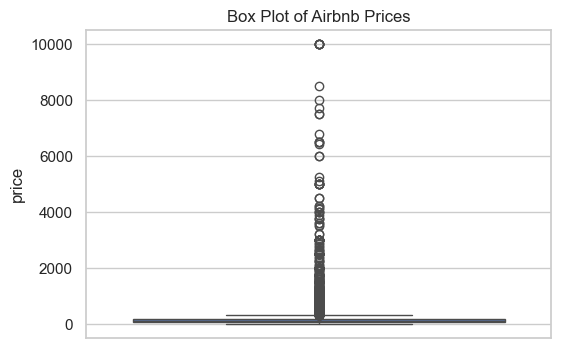

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(y=df['price'])
plt.title("Box Plot of Airbnb Prices")
plt.show()


### Outlier Handling

Listings with extremely high prices are removed to improve data reliability.


In [17]:
# Remove extreme price outliers
df = df[df['price'] < 1000]


### Final Data Integrity Check

The dataset is checked again to ensure it is clean and consistent.


In [18]:
df.isnull().sum()


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [19]:
df.shape


(48597, 15)

In [20]:
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,brooklyn,Kensington,40.64749,-73.97237,private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,manhattan,Midtown,40.75362,-73.98377,entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,manhattan,Harlem,40.80902,-73.94190,private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,brooklyn,Clinton Hill,40.68514,-73.95976,entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,manhattan,East Harlem,40.79851,-73.94399,entire home/apt,80,10,9,0.10,1,0


### Save Cleaned Dataset

The cleaned dataset is saved for future analysis and modeling.


In [21]:
df.to_csv("AB_NYC_2019_CLEANED.csv", index=False)


## Conclusion

In this project, the Airbnb NYC 2019 dataset was cleaned by handling missing values,
removing duplicate records, standardizing text fields, and addressing outliers.

These steps improved data integrity and ensured the dataset is reliable
and ready for further data analysis or machine learning tasks.
